In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings


df = pd.read_csv('/home/m2khoda/vigasa/Video-Game-Sales-Prediction/data/raw/vgsalesGlobale.csv')
df.dropna(subset=['Year', 'Publisher'], inplace=True) 
df['Year'] = df['Year'].astype(int)

Prediction accuracy: 99.75%
Confusion Matrix:
 [[2880    0]
 [   8  371]]


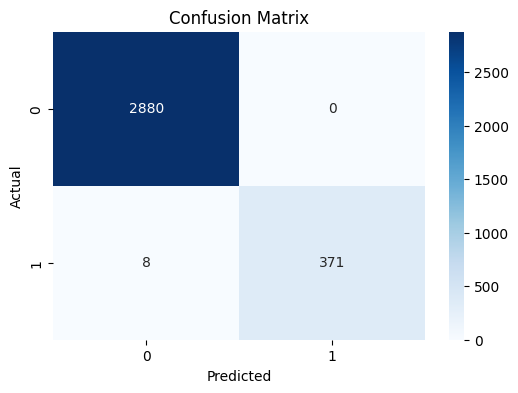

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


df['Hit'] = (df['Global_Sales'] > 1.0).astype(int)
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = df[features]
y = df['Hit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction accuracy: {accuracy*100:.2f}%')

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

X_cls = df[features]
y_cls = df['Hit']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

scaler_cls = StandardScaler()
Xc_train_scaled = scaler_cls.fit_transform(Xc_train)
Xc_test_scaled = scaler_cls.transform(Xc_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(Xc_train_scaled, yc_train)

yc_pred = knn_classifier.predict(Xc_test_scaled)

print(classification_report(yc_test, yc_pred))
print(f"Accuracy: {accuracy_score(yc_test, yc_pred) * 100:.2f}%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2880
           1       0.98      0.98      0.98       379

    accuracy                           1.00      3259
   macro avg       0.99      0.99      0.99      3259
weighted avg       1.00      1.00      1.00      3259

Accuracy: 99.60%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

label_encoders = {}
categorical_features = ['Platform', 'Genre', 'Publisher']
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

X = df[['Platform', 'Genre', 'Publisher', 'Year', 
        'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression Performance:")
print(f"RMSE: {lin_rmse:.4f}")
print(f"R²: {lin_r2:.4f}\n")

Linear Regression Performance:
RMSE: 0.0054
R²: 1.0000



In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)
y_pred_knn = knn_reg.predict(X_test_scaled)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, y_pred_knn)

print("KNN Regression Performance:")
print(f"RMSE: {knn_rmse:.4f}")
print(f"R²: {knn_r2:.4f}\n")

model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regression'],
    'RMSE': [lin_rmse, knn_rmse],
    'R2 Score': [lin_r2, knn_r2]
})

print(model_performance)

KNN Regression Performance:
RMSE: 0.9839
R²: 0.7737

               Model      RMSE  R2 Score
0  Linear Regression  0.005356  0.999993
1     KNN Regression  0.983930  0.773697


/tmp/ipykernel_4038516/2977746794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=model_performance, palette='viridis')


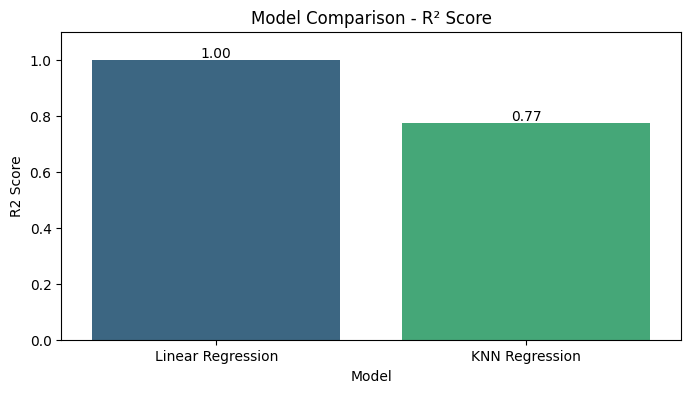

In [7]:
plt.figure(figsize=(8, 4)) 
sns.barplot(x='Model', y='R2 Score', data=model_performance, palette='viridis') 
plt.title('Model Comparison - R² Score') 
for i, row in model_performance.iterrows(): 
    plt.text(i, row['R2 Score'] + 0.01, f"{row['R2 Score']:.2f}", ha='center') 
plt.ylim(0, 1.1) 
plt.show() 

/tmp/ipykernel_4038516/3191363934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=model_performance,


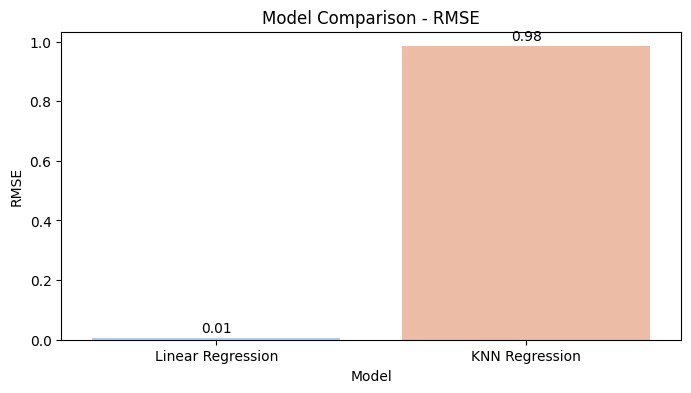

In [6]:
plt.figure(figsize=(8, 4)) 
sns.barplot(x='Model', y='RMSE', data=model_performance, 
palette='coolwarm') 
plt.title('Model Comparison - RMSE') 
for i, row in model_performance.iterrows(): 
    plt.text(i, row.RMSE + 0.02, f"{row.RMSE:.2f}", ha='center') 
plt.show()

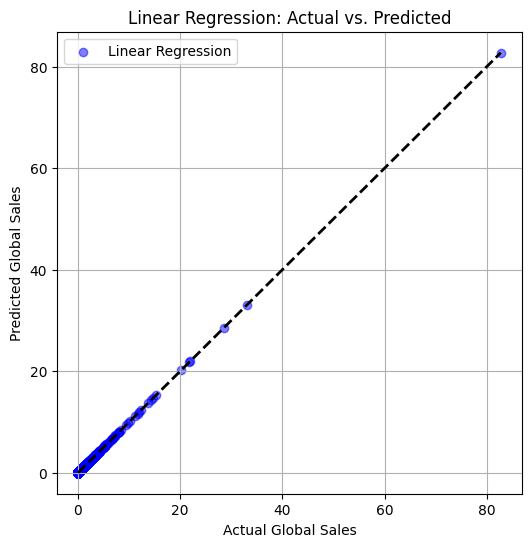

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue', label='Linear Regression') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel('Actual Global Sales') 
plt.ylabel('Predicted Global Sales') 
plt.title('Linear Regression: Actual vs. Predicted') 
plt.legend() 
plt.grid(True) 
plt.show() 

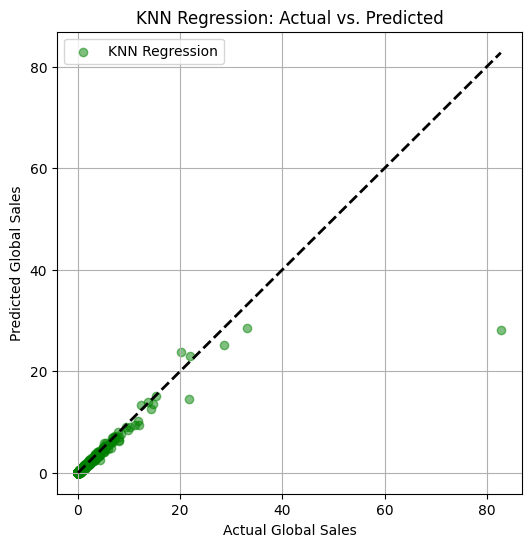

In [10]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='green', label='KNN Regression') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel('Actual Global Sales') 
plt.ylabel('Predicted Global Sales') 
plt.title('KNN Regression: Actual vs. Predicted') 
plt.legend() 
plt.grid(True) 
plt.show()